<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
figsize(20, 9)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [3]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data[data["sex"] == "Male"]["sex"].value_counts()

Male    21790
Name: sex, dtype: int64

In [13]:
data[data["sex"] == "Female"]["sex"].value_counts()

Female    10771
Name: sex, dtype: int64

Кол-во мужчин и женщин - 32561, пропусков в данных нет : )
Кол-во женщин - 10771
Кол-во мужчин - 21790

**2. Каков средний возраст (признак age) женщин?**

In [15]:
# Ваш код здесь
data[data["sex"] == "Female"]["age"].mean()

36.85823043357163

Средний возраст среди женщин - 36-37 лет

**3. Какова доля граждан Германии (признак native-country)?**

In [21]:
# Ваш код здесь
data[data['native-country'] == 'Germany']['native-country'].value_counts()

Germany    137
Name: native-country, dtype: int64

In [44]:
a =float(137.0/32561.0)*100
a

0.42074874850281013

Доля граждан Германии 0,42%

**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

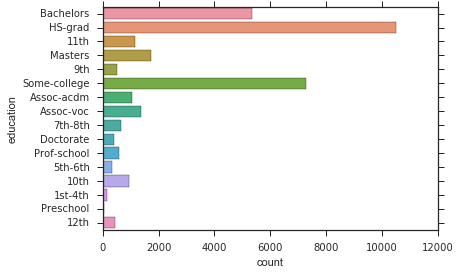

In [220]:
sns.countplot(y = 'education', data = data)

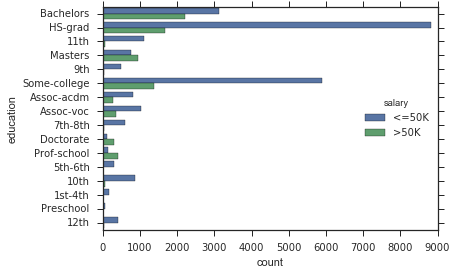

In [219]:
sns.countplot(y = 'education', data = data, hue = 'salary')

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? **

In [253]:
# Ваш код здесь
print u'среднее,', u'среднеквадратичное отклонение:', "\n", 
data[data['salary'] == '>50K']['age'].mean(), data[data['salary'] == '>50K']['age'].std()

среднее, среднеквадратичное отклонение: 
44.2498405816 10.5190277199


In [255]:
print u'среднее,', u'среднеквадратичное отклонение:', "\n",
data[data['salary'] == '<=50K']['age'].mean(), data[data['salary'] == '>50K']['age'].std()

среднее, среднеквадратичное отклонение: 


(36.78373786407767, 10.51902771985177)

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [162]:
# Ваш код здесь
data[data['salary'] == '>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**Нет, есть еще и без высшего образования**

**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe.**

In [203]:
data.groupby(['race','sex'])['age'].describe()

race                sex          
Amer-Indian-Eskimo  Female  count      119.000000
                            mean        37.117647
                            std         13.114991
                            min         17.000000
                            25%         27.000000
                            50%         36.000000
                            75%         46.000000
                            max         80.000000
                    Male    count      192.000000
                            mean        37.208333
                            std         12.049563
                            min         17.000000
                            25%         28.000000
                            50%         35.000000
                            75%         45.000000
                            max         82.000000
Asian-Pac-Islander  Female  count      346.000000
                            mean        35.089595
                            std         12.300845
                

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)?**

In [221]:
# Ваш код здесь
data[data['salary'] == '>50K']['marital-status'].value_counts()

Married-civ-spouse       6692
Never-married             491
Divorced                  463
Widowed                    85
Separated                  66
Married-spouse-absent      34
Married-AF-spouse          10
Name: marital-status, dtype: int64

In [224]:
data.groupby('marital-status')['salary'].value_counts()

marital-status         salary
Divorced               <=50K      3980
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8284
                       >50K       6692
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10192
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

**Самая большая доля зарабатывают больше 50К среди женатых.**

**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [232]:
# Ваш код здесь
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

99 - максимальное число часов человек работает в неделю

In [237]:
data[data['hours-per-week'] ==99]['hours-per-week'].value_counts()

99    85
Name: hours-per-week, dtype: int64

Всего 85 человек работают 99 часов в неделю

In [240]:
data[data['hours-per-week'] ==99]['salary'].value_counts()

<=50K    60
>50K     25
Name: salary, dtype: int64

In [244]:
round(25/85.0*100, 2)

29.41

Среди людей, работающих 99 часов в неделю, 29.41% зарабатывающих >50K

**10. Посчитайте среднее время работы (hours-per-week) зарабатывающих много и мало (salary) для каждой страны (native-country).**

In [246]:
# Ваш код здесь
data.groupby(['native-country','salary'])['hours-per-week'].mean()

native-country              salary
?                           <=50K     40.164760
                            >50K      45.547945
Cambodia                    <=50K     41.416667
                            >50K      40.000000
Canada                      <=50K     37.914634
                            >50K      45.641026
China                       <=50K     37.381818
                            >50K      38.900000
Columbia                    <=50K     38.684211
                            >50K      50.000000
Cuba                        <=50K     37.985714
                            >50K      42.440000
Dominican-Republic          <=50K     42.338235
                            >50K      47.000000
Ecuador                     <=50K     38.041667
                            >50K      48.750000
El-Salvador                 <=50K     36.030928
                            >50K      45.000000
England                     <=50K     40.483333
                            >50K      44.533333
Franc